# 비슷한 향수 추천

In [15]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [16]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [185]:
rating_data = pd.read_csv('/content/gdrive/MyDrive/향수/csv/reviews.csv')
perfume_data = pd.read_csv('/content/gdrive/MyDrive/향수/csv/perfumes_sentiment.csv')
note_data = pd.read_csv('/content/gdrive/MyDrive/향수/csv/notes_sentiment.csv')

In [34]:
rating_data.head()

,userId,content,rating,perfumeId,created_at
0,1,This is a grown-up powdery perfume. Very femi...,7,26149998,2017-09-02 00:00:00
1,2,"The cardamom, orange blossom, amber and sandal...",2,26150000,2016-11-04 00:00:00
2,1,"The main stars here are black current, peach, ...",8,26150001,2018-07-23 00:00:00
3,3,"Terrible heliotrope bomb, performance is spect...",2,26150002,2016-12-26 00:00:00
4,4,"Not a fan of earthy scents, but I like this on...",4,26150002,2018-11-07 00:00:00


In [79]:
perfume_data.head()

,perfumeId,heart_notes,seasons,name,brand,base_notes,categories,price,top_notes,gender,launch_date,availability
0,26120000,"[224, 259, 510, 785]","[3, 4]",Ambre Canelle,749,"[28, 624]","[3, 6]",169.99,"[224, 480]",0,1949-01-01,False
1,26120001,[],[],Angélique Encens,749,[],[],2000.00,"[28, 42, 472, 473, 785, 920]",0,1933-01-01,False
2,26120002,[],[],Oud,102,[],[],99.00,[],0,NaN,True
3,26120003,"[358, 545, 785]","[1, 2, 3, 4]",X-Centric,895,"[26, 193, 624, 692]",[3],21.00,"[178, 224, 229, 292, 388, 395, 646]",1,2001-01-01,True
4,26120005,[],[],Space for Men,601,[],[],44.95,[],0,NaN,True


In [129]:
note_data

,pk,name,kor_name,sentiment
0,82,basil,바질,우울감 극복
1,95,benzoin,벤조인,행복감 고양
2,229,clary sage,클라리 세이지,우울감 극복
3,292,cypress,사이프레스,진정
4,336,eucalyptus,유칼립투스,행복감 고양
5,388,grapefruit,그레이프프룻,우울감 극복
6,472,jasmine,자스민,진정
7,512,lavender,라벤더,진정
8,515,lemon,레몬,행복감 고양
9,522,lemongrass,레몬그라스,행복감 고양


In [131]:
import ast

perfume_data['top_notes'] = perfume_data['top_notes'].apply(ast.literal_eval)
perfume_data['heart_notes'] = perfume_data['heart_notes'].apply(ast.literal_eval)
perfume_data['base_notes'] = perfume_data['base_notes'].apply(ast.literal_eval)

In [148]:
filtered_rows1 = perfume_data[perfume_data['top_notes'].apply(lambda x: 82 in x and all(item not in x for item in [95, 292, 336, 472, 512, 515, 522, 785, 808]))]
filtered_rows2 = perfume_data[perfume_data['top_notes'].apply(lambda x: 229 in x and all(item not in x for item in [95, 292, 336, 472, 512, 515, 522, 785, 808]))]
filtered_rows3 = perfume_data[perfume_data['top_notes'].apply(lambda x: 388 in x and all(item not in x for item in [95, 292, 336, 472, 512, 515, 522, 785, 808]))]
filtered_rows4 = perfume_data[perfume_data['top_notes'].apply(lambda x: 639 in x and all(item not in x for item in [95, 292, 336, 472, 512, 515, 522, 785, 808]))]
filtered_rows5 = perfume_data[perfume_data['top_notes'].apply(lambda x: 966 in x and all(item not in x for item in [95, 292, 336, 472, 512, 515, 522, 785, 808]))]

In [149]:
filtered_rows6 = perfume_data[perfume_data['top_notes'].apply(lambda x: 95 in x and all(item not in x for item in [82, 229, 292, 388, 472, 512, 639, 785, 808, 966]))]
filtered_rows7 = perfume_data[perfume_data['top_notes'].apply(lambda x: 336 in x and all(item not in x for item in [82, 229, 292, 388, 472, 512, 639, 785, 808, 966]))]
filtered_rows8 = perfume_data[perfume_data['top_notes'].apply(lambda x: 515 in x and all(item not in x for item in [82, 229, 292, 388, 472, 512, 639, 785, 808, 966]))]
filtered_rows9 = perfume_data[perfume_data['top_notes'].apply(lambda x: 522 in x and all(item not in x for item in [82, 229, 292, 388, 472, 512, 639, 785, 808, 966]))]

In [150]:
filtered_rows10 = perfume_data[perfume_data['top_notes'].apply(lambda x: 292 in x and all(item not in x for item in [82, 95, 229, 336, 388, 515, 522, 639, 966]))]
filtered_rows11 = perfume_data[perfume_data['top_notes'].apply(lambda x: 472 in x and all(item not in x for item in [82, 95, 229, 336, 388, 515, 522, 639, 966]))]
filtered_rows12 = perfume_data[perfume_data['top_notes'].apply(lambda x: 512 in x and all(item not in x for item in [82, 95, 229, 336, 388, 515, 522, 639, 966]))]
filtered_rows13 = perfume_data[perfume_data['top_notes'].apply(lambda x: 785 in x and all(item not in x for item in [82, 95, 229, 336, 388, 515, 522, 639, 966]))]
filtered_rows14 = perfume_data[perfume_data['top_notes'].apply(lambda x: 808 in x and all(item not in x for item in [82, 95, 229, 336, 388, 515, 522, 639, 966]))]

In [155]:
print(len(filtered_rows1))
print(len(filtered_rows2))
print(len(filtered_rows3))
print(len(filtered_rows4))
print(len(filtered_rows5))
print(len(filtered_rows6))
print(len(filtered_rows7))
print(len(filtered_rows8))
print(len(filtered_rows9))
print(len(filtered_rows10))
print(len(filtered_rows11))
print(len(filtered_rows12))
print(len(filtered_rows13))
print(len(filtered_rows14))

346
161
1846
771
399
0
55
2306
0
194
592
966
2655
1494


In [171]:
# 여러 데이터프레임을 리스트로 저장
filtered_dataframes1 = [filtered_rows1, filtered_rows2, filtered_rows3, filtered_rows4, filtered_rows5]
filtered_dataframes2 = [filtered_rows6, filtered_rows7, filtered_rows8, filtered_rows9]
filtered_dataframes3 = [filtered_rows10, filtered_rows11, filtered_rows12, filtered_rows13, filtered_rows14]

# 데이터프레임을 합침
combined_data1 = pd.concat(filtered_dataframes1)
combined_data2 = pd.concat(filtered_dataframes2)
combined_data3 = pd.concat(filtered_dataframes3)

# 중복된 행을 제거
unique_combined_data1 = combined_data1.drop_duplicates(subset='name')
unique_combined_data2 = combined_data2.drop_duplicates(subset='name')
unique_combined_data3 = combined_data3.drop_duplicates(subset='name')

# 중복된 행을 제거한 데이터프레임에 'sentiment' 열 추가
unique_combined_data1['sentiment'] = '우울감 극복'
unique_combined_data2['sentiment'] = '행복감 고양'
unique_combined_data3['sentiment'] = '진정'

# 합치기
filtered_dataframes = [unique_combined_data1, unique_combined_data2, unique_combined_data3]
combined_data = pd.concat(filtered_dataframes)
combined_data

,perfumeId,heart_notes,seasons,name,brand,base_notes,categories,price,top_notes,gender,launch_date,availability,sentiment
59,26120065,"[180, 246, 473, 785]",[4],Agreste,1147,"[513, 624, 649, 652, 692]",[3],0.00,"[60, 82, 96, 282, 480]",1,1982-01-01,True,우울감 극복
68,26120074,"[180, 224, 246, 372]",[4],Alain Delon / AD,113,"[26, 193, 649, 903]",[3],17.95,"[82, 96, 480, 510, 962]",1,1980-01-01,False,우울감 극복
93,26120100,"[178, 473]","[3, 4]",Andy Warhol for Men,193,"[193, 624, 649, 808]","[3, 6]",14.98,"[82, 886]",1,1999-01-01,True,우울감 극복
142,26120149,[193],"[3, 4]",Avon Uomo,315,"[292, 624]",[8],15.06,"[82, 480]",1,2000-01-01,True,우울감 극복
282,26120290,"[193, 395]",[3],Candie's Men,562,"[341, 649, 652, 808]","[5, 8]",12.84,"[82, 178, 259, 388, 741, 940]",1,1999-01-01,False,우울감 극복
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39536,26160491,[],[],Saffron Orris,1652,[],[],6.49,"[562, 646, 669, 800, 802, 808]",0,2019-01-01,True,진정
39572,26160528,[],[],Attar Al Oudh,138,[],[],0.00,"[7, 808]",0,NaN,True,진정
39581,26160537,[],[],Tiwa,2344,[],[],4.25,"[483, 530, 661, 692, 715, 808, 883, 924]",0,2019-01-01,True,진정
39624,26160580,[],[],Ambre Stone,1873,[],[],0.00,"[28, 96, 473, 692, 808]",0,2017-01-01,True,진정


In [172]:
combined_data = combined_data.reset_index(drop=True)

In [173]:
combined_data

,perfumeId,heart_notes,seasons,name,brand,base_notes,categories,price,top_notes,gender,launch_date,availability,sentiment
0,26120065,"[180, 246, 473, 785]",[4],Agreste,1147,"[513, 624, 649, 652, 692]",[3],0.00,"[60, 82, 96, 282, 480]",1,1982-01-01,True,우울감 극복
1,26120074,"[180, 224, 246, 372]",[4],Alain Delon / AD,113,"[26, 193, 649, 903]",[3],17.95,"[82, 96, 480, 510, 962]",1,1980-01-01,False,우울감 극복
2,26120100,"[178, 473]","[3, 4]",Andy Warhol for Men,193,"[193, 624, 649, 808]","[3, 6]",14.98,"[82, 886]",1,1999-01-01,True,우울감 극복
3,26120149,[193],"[3, 4]",Avon Uomo,315,"[292, 624]",[8],15.06,"[82, 480]",1,2000-01-01,True,우울감 극복
4,26120290,"[193, 395]",[3],Candie's Men,562,"[341, 649, 652, 808]","[5, 8]",12.84,"[82, 178, 259, 388, 741, 940]",1,1999-01-01,False,우울감 극복
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10582,26160491,[],[],Saffron Orris,1652,[],[],6.49,"[562, 646, 669, 800, 802, 808]",0,2019-01-01,True,진정
10583,26160528,[],[],Attar Al Oudh,138,[],[],0.00,"[7, 808]",0,NaN,True,진정
10584,26160537,[],[],Tiwa,2344,[],[],4.25,"[483, 530, 661, 692, 715, 808, 883, 924]",0,2019-01-01,True,진정
10585,26160580,[],[],Ambre Stone,1873,[],[],0.00,"[28, 96, 473, 692, 808]",0,2017-01-01,True,진정


In [175]:
print(len(combined_data[combined_data['sentiment'] == '우울감 극복']))
print(len(combined_data[combined_data['sentiment'] == '행복감 고양']))
print(len(combined_data[combined_data['sentiment'] == '진정']))

3279
2318
4990


In [209]:
# 'perfumeId' 열을 기준으로 df_perfumes와 df_ratings 데이터프레임을 병합
merged_df = df_ratings.merge(df_perfumes[['perfumeId']], on='perfumeId', how='inner')

merged_df

,userId,content,rating,perfumeId,created_at
0,1,"The main stars here are black current, peach, ...",8,26150001,2018-07-23 00:00:00
1,3,"Terrible heliotrope bomb, performance is spect...",2,26150002,2016-12-26 00:00:00
2,4,"Not a fan of earthy scents, but I like this on...",4,26150002,2018-11-07 00:00:00
3,5,"Another neutral rated EdP from the ""Les Extrai...",6,26150002,2018-09-30 00:00:00
4,6,i get the smell of incense trying to fight it'...,6,26150002,2018-08-12 00:00:00
...,...,...,...,...,...
2136,39,"Mohragot is the nouveau fougère of the line, k...",6,26160533,2020-04-02 00:00:00
2137,39,Maruyama smells to me like a richly vegetal ci...,5,26160536,2020-04-02 00:00:00
2138,39,"Cigar Rum Intense is the same as Cigar Rum, bu...",2,26160551,2020-04-02 00:00:00
2139,151,"No. 59 opens with a nose tingling, fresh nutme...",7,26160598,2020-03-01 00:00:00


In [210]:
merged_df.to_csv('/content/gdrive/MyDrive/향수/csv/users_sentiment.csv', index=False, encoding='utf-8')

In [184]:
print(combined_data.shape)

(10587, 13)


In [186]:
print(perfume_data.shape)
print(rating_data.shape)

(10587, 13)
(6288, 5)


In [208]:
user_perfume_data = pd.merge(rating_data, perfume_data, on = 'perfumeId')
user_perfume_data

,userId,content,rating,perfumeId,created_at,heart_notes,seasons,name,brand,base_notes,categories,price,top_notes,gender,launch_date,availability,sentiment
0,1,"The main stars here are black current, peach, ...",8,26150001,2018-07-23 00:00:00,"[303, 473, 529, 695]","[2, 3]",Always Red Femme,936,"[193, 649, 692, 920]",[3],16.99,[515],0,2016-01-01,True,행복감 고양
1,3,"Terrible heliotrope bomb, performance is spect...",2,26150002,2016-12-26 00:00:00,[],[],Vert d'Encens,3032,[],[],24.95,"[421, 472]",0,2016-01-01,True,진정
2,4,"Not a fan of earthy scents, but I like this on...",4,26150002,2018-11-07 00:00:00,[],[],Vert d'Encens,3032,[],[],24.95,"[421, 472]",0,2016-01-01,True,진정
3,5,"Another neutral rated EdP from the ""Les Extrai...",6,26150002,2018-09-30 00:00:00,[],[],Vert d'Encens,3032,[],[],24.95,"[421, 472]",0,2016-01-01,True,진정
4,6,i get the smell of incense trying to fight it'...,6,26150002,2018-08-12 00:00:00,[],[],Vert d'Encens,3032,[],[],24.95,"[421, 472]",0,2016-01-01,True,진정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,39,"Mohragot is the nouveau fougère of the line, k...",6,26160533,2020-04-02 00:00:00,[],[],Mohragot,2344,[],[],0.00,"[7, 200, 224, 237, 356, 472, 473, 530, 574, 62...",0,2019-01-01,True,진정
2137,39,Maruyama smells to me like a richly vegetal ci...,5,26160536,2020-04-02 00:00:00,[],[],Maruyama,2344,[],[],13.99,"[33, 39, 42, 60, 163, 193, 201, 472, 547, 576,...",0,2019-01-01,True,진정
2138,39,"Cigar Rum Intense is the same as Cigar Rum, bu...",2,26160551,2020-04-02 00:00:00,[],[],Cigar Rum Intense,2886,[],[],0.00,"[26, 224, 247, 317, 498, 513, 562, 778, 785, 7...",1,2019-01-01,True,진정
2139,151,"No. 59 opens with a nose tingling, fresh nutme...",7,26160598,2020-03-01 00:00:00,"[193, 652, 785, 900]",[3],No 59 : Tobacco & Frankincense,2011,"[498, 920]","[3, 5, 8, 9]",0.00,"[178, 224, 646, 708, 785]",0,2020-01-01,True,진정


In [188]:
user_perfume_data.shape

(2141, 17)

In [189]:
user_perfume_rating = user_perfume_data.pivot_table('rating', index = 'userId', columns='name').fillna(0)

In [190]:
user_perfume_rating.shape

(463, 892)

In [191]:
user_perfume_rating.head()

name,Pr*a*rie,iloreN,#Midsummer Orange Zest,1 Million Lucky,1001,1900 L'Heure de Proust,1932 Eau de Parfum,1957,20 Years,"20,000 Flowers Under The Sea No. 31",...,Y Live,Yacht Man Chocolate,Ylanga,You Or Someone Like You,Zenne,Zest Marin,lumen_esce,Él,Étude en Fougère,Œillères
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
perfume_user_rating = user_perfume_rating.values.T
perfume_user_rating.shape

(892, 463)

In [193]:
type(perfume_user_rating)

numpy.ndarray

In [194]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(perfume_user_rating)
matrix.shape

(892, 12)

In [196]:
matrix[0]

array([ 0.29932918,  0.36048384, -0.16642119,  0.09786129,  0.02343228,
       -0.26689919, -0.24111022,  1.93042596, -2.02874276,  6.11180021,
        0.4973859 ,  0.6869975 ])

In [197]:
corr = np.corrcoef(matrix)
corr.shape

(892, 892)

In [198]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

<Axes: >

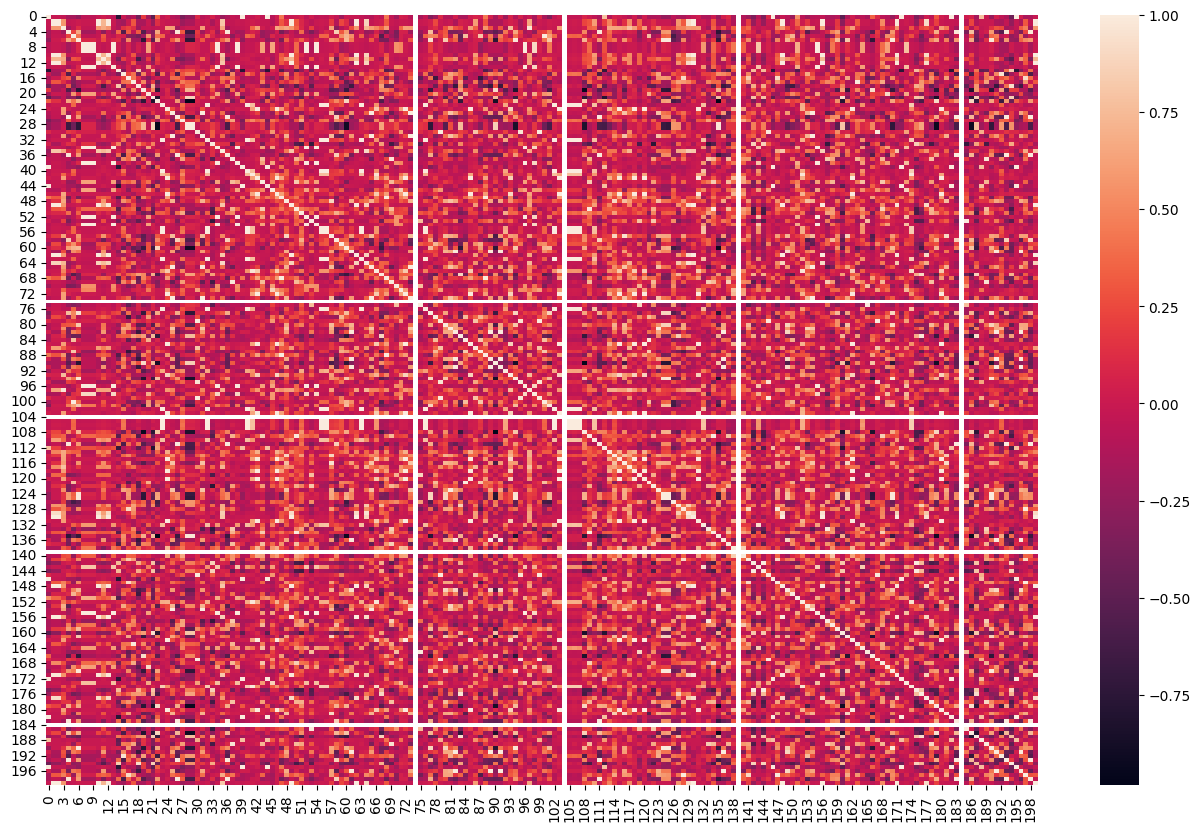

In [199]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [201]:
perfume_name = user_perfume_rating.columns
perfume_name_list = list(perfume_name)
coffey_hands = perfume_name_list.index("1001")

In [202]:
corr_coffey_hands  = corr[coffey_hands]
list(perfume_name[(corr_coffey_hands >= 0.9)])[:50]

['1001',
 'Agrumi',
 'Altrove',
 'Black Opium Floral Shock',
 'Credible Noir',
 'Cuoio dei Dolci',
 'Dange-Rose',
 'Dark Side of the Goddess',
 'Desert Rose',
 'Día De Los Muertos',
 "Fiore delL'Onda",
 'Ghost House',
 'Ginepro Nero / Black Juniper',
 'Gucci Bloom Nettare di Fiori',
 'Gunpowder Cologne',
 'Jasmagonda 23.1',
 'Jood',
 'Just Rock! pour Lui',
 'Le Gemme : Ambero',
 'Le Gemme : Gyan',
 'Leather Sensation',
 'Loud Whisper',
 'Meydan',
 'Miracle Blossom',
 'Mon Paris Couture',
 'Musk Abiyad Deluxe',
 'Narciso Eau de Parfum Rouge',
 'Nobil Homo : Venetian Blue',
 'Orchidea',
 'Shiny Amber',
 'Singular Oud',
 'Terra Mia']

# 한 사용자에게 개인 추천
- 여기서부터 유저 개인에게 추천하는 코드


In [347]:
df_ratings  = pd.read_csv('/content/gdrive/MyDrive/향수/csv/reviews_sentiment.csv')
df_perfumes  = pd.read_csv('/content/gdrive/MyDrive/향수/csv/perfumes_sentiment.csv')

In [348]:
# 각 유저별로 평점 개수를 세어봅니다.
user_ratings_count = df_ratings['userId'].value_counts()

# 평점 개수가 10개 이상인 유저만 남깁니다.
df_ratings = df_ratings[df_ratings['userId'].isin(user_ratings_count[user_ratings_count >= 5].index)]

In [349]:
df_ratings

,userId,content,rating,perfumeId,created_at
0,1,"The main stars here are black current, peach, ...",8,26150001,2018-07-23 00:00:00
1,3,"Terrible heliotrope bomb, performance is spect...",2,26150002,2016-12-26 00:00:00
2,4,"Not a fan of earthy scents, but I like this on...",4,26150002,2018-11-07 00:00:00
3,5,"Another neutral rated EdP from the ""Les Extrai...",6,26150002,2018-09-30 00:00:00
4,6,i get the smell of incense trying to fight it'...,6,26150002,2018-08-12 00:00:00
...,...,...,...,...,...
2136,39,"Mohragot is the nouveau fougère of the line, k...",6,26160533,2020-04-02 00:00:00
2137,39,Maruyama smells to me like a richly vegetal ci...,5,26160536,2020-04-02 00:00:00
2138,39,"Cigar Rum Intense is the same as Cigar Rum, bu...",2,26160551,2020-04-02 00:00:00
2139,151,"No. 59 opens with a nose tingling, fresh nutme...",7,26160598,2020-03-01 00:00:00


In [350]:
df_user_perfume_ratings = df_ratings.pivot(
    index='userId',
    columns='perfumeId',
    values='rating'
).fillna(0)

In [351]:
df_user_perfume_ratings.head()

perfumeId,26150001,26150002,26150004,26150005,26150009,26150010,26150019,26150022,26150037,26150086,...,26160386,26160462,26160480,26160530,26160532,26160533,26160536,26160551,26160598,26160647
userId,,,,,,,,,,,,,,,,,,,,,
1,8.0,7.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것
matrix = df_user_perfume_ratings.values

# user_ratings_mean은 사용자의 평균 평점
user_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

In [353]:
matrix

array([[8., 7., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [354]:
matrix.shape

(82, 778)

In [355]:
user_ratings_mean.shape

(82,)

In [356]:
matrix_user_mean.shape

(82, 778)

In [357]:
pd.DataFrame(matrix_user_mean, columns = df_user_perfume_ratings.columns).head()

perfumeId,26150001,26150002,26150004,26150005,26150009,26150010,26150019,26150022,26150037,26150086,...,26160386,26160462,26160480,26160530,26160532,26160533,26160536,26160551,26160598,26160647
0,7.055270,6.055270,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730,7.055270,8.055270,5.055270,...,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730,-0.944730
1,-0.028278,1.971722,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,...,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278,-0.028278
2,-0.200514,3.799486,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,...,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514,-0.200514
3,-0.800771,5.199229,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,...,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771,-0.800771
4,-0.100257,5.899743,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,...,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257,-0.100257


In [358]:
# scipy에서 제공해주는 svd.
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k = 50)

In [359]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(82, 50)
(50,)
(50, 778)


In [360]:
sigma = np.diag(sigma)

In [361]:
sigma.shape

(50, 50)

In [362]:
sigma[0]

array([19.27237701,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [363]:
sigma[1]

array([ 0.        , 19.52978626,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [364]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다.
# 거기에 + 사용자 평균 rating을 적용한다.
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [365]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_perfume_ratings.columns)
df_svd_preds.head()

perfumeId,26150001,26150002,26150004,26150005,26150009,26150010,26150019,26150022,26150037,26150086,...,26160386,26160462,26160480,26160530,26160532,26160533,26160536,26160551,26160598,26160647
0,7.985061,7.012388,0.012808,0.044540,-0.016875,-0.041984,-0.014775,7.962930,8.977221,6.059749,...,0.006107,-0.006450,0.020116,0.038565,0.024383,0.022700,0.021858,0.019333,0.047188,0.018472
1,0.109875,0.843063,0.031518,0.074055,-0.040603,0.016147,0.220828,0.026135,0.143677,0.038716,...,0.044857,-0.024933,0.022210,0.058693,-0.093759,-0.069088,-0.056753,-0.019746,-0.036751,0.010686
2,-0.028438,3.712013,-0.050077,0.187802,-0.105013,0.041523,0.022679,0.010871,-0.047134,-0.194455,...,-0.016589,0.013020,0.015531,0.140208,-0.040747,-0.037153,-0.035356,-0.029965,-0.117260,-0.012404
3,0.010131,6.081857,-0.004449,-0.115413,0.023520,-0.004540,-0.054854,-0.016424,-0.013400,-0.049399,...,0.016305,-0.000122,0.015978,-0.084513,-0.007165,0.000535,0.004385,0.015935,0.029315,0.021083
4,0.037524,5.606442,-0.006146,-0.062784,-0.107003,0.066663,-0.177889,0.000013,0.010702,-0.105264,...,0.086479,-0.037225,0.026084,-0.042252,-0.333138,-0.242451,-0.197107,-0.061076,0.021573,0.028436


In [366]:
df_svd_preds.shape

(82, 778)

In [368]:
def recommend_perfumes(df_svd_preds, user_id, ori_perfumes_df, ori_ratings_df, num_recommendations=5):

    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1

    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)

    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다.
    user_data = ori_ratings_df[ori_ratings_df.userId == user_id]

    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다.
    user_history = user_data.merge(ori_perfumes_df, on = 'perfumeId').sort_values(['rating'], ascending=False)

    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    #recommendations = ori_perfumes_df[~ori_perfumes_df['perfumeId'].isin(user_history['perfumeId'])]
    recommendations = ori_perfumes_df
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다.
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'perfumeId')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]


    return user_history, recommendations

In [369]:
already_rated, predictions = recommend_perfumes(df_svd_preds, 5, df_perfumes, df_ratings, 10)

In [371]:
predictions

,perfumeId,heart_notes,seasons,name,brand,base_notes,categories,price,top_notes,gender,launch_date,availability,sentiment,Predictions
595,26154627,[],[],Black Vanilla,1918,[],[],63.33,"[96, 102, 245, 473, 624, 785, 920, 927]",0,2017-01-01,True,진정,9.415859
406,26154794,"[473, 692]","[3, 4]",Red Tobacco,1918,"[26, 624, 900, 920, 924, 959]","[3, 8]",0.00,"[45, 224, 472, 646, 800]",1,2017-01-01,True,진정,8.834254
576,26153416,[473],"[1, 2, 3, 4]",Odeon / Petite Fleur Bleue,1210,"[193, 472, 649]",[3],0.00,"[96, 358, 785]",0,1921-01-01,True,진정,8.270706
465,26153275,[],[],Arabians,2102,[],[],0.00,"[26, 178, 512, 513, 692, 785, 924]",0,2017-01-01,True,진정,7.982362
721,26153417,"[193, 692, 924]","[3, 4]",Cuir de Russie (new),1210,[7],[8],0.00,"[237, 282, 808]",0,2017-01-01,True,진정,7.922574
724,26153692,[],[],Panthea,2889,[],[],79.00,"[96, 180, 183, 331, 461, 473, 624, 692, 725, 8...",0,2017-01-01,True,진정,7.719896
100,26155133,"[237, 473, 639, 785]","[1, 2, 3, 4]",Antedios,452,"[7, 624, 808, 920]",[3],0.00,[388],1,2015-01-01,True,우울감 극복,6.882485
623,26156130,"[336, 624, 692, 924]","[3, 4]",Aqua Regia,109,"[7, 920]",[8],0.00,"[96, 785]",0,2016-01-01,True,진정,6.034526
372,26150002,[],[],Vert d'Encens,3032,[],[],24.95,"[421, 472]",0,2016-01-01,True,진정,5.606442
729,26154344,[],[],Golden Powder,1344,[],[],0.00,"[193, 224, 403, 498, 624, 646, 684, 808, 900, ...",0,2016-01-01,True,진정,5.169267


In [377]:
already_rated

,userId,content,rating,perfumeId,created_at,heart_notes,seasons,name,brand,base_notes,categories,price,top_notes,gender,launch_date,availability,sentiment
65,5,"A lovely, spiritually friendly experience from...",9,26156617,2018-12-01 00:00:00,[],[],Santal Noir,653,[],[],0.00,"[33, 785, 808]",0,2018-01-01,True,진정
78,5,A great balsamic-spicy scent from Ferragamo!\n...,9,26157109,2018-10-14 00:00:00,"[513, 692, 800]","[3, 4]",Tuscan Creations : Testa di Moro,2706,"[586, 808, 863, 900]","[6, 8, 10]",0.00,"[317, 472, 725]",0,2018-01-01,True,진정
43,5,Unmistakably powdery vanilla and moderately sw...,9,26153743,2018-10-30 00:00:00,[],[],Magnificent Gold,3227,[],[],16.99,"[624, 725, 800, 808, 920, 949]",0,2017-01-01,True,진정
1,5,I expected this outing from the Tuscan Scent c...,9,26150110,2018-10-17 00:00:00,"[785, 785]","[1, 2, 3, 4]",Tuscan Scent : Leather Rose,2706,"[293, 864]",[3],106.28,"[178, 785]",0,2016-01-01,False,진정
41,5,An interesting non L'Eau d'Issey fragrance fro...,9,26153568,2018-09-11 00:00:00,"[573, 805]","[1, 3]",L'Eau Majeure d'Issey,1418,"[7, 187]","[2, 12]",8.50,"[96, 388]",0,2017-01-01,True,우울감 극복
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,5,It is my honor to be the SECOND reviewer of th...,6,26153272,2018-09-22 00:00:00,"[98, 461, 498, 863]","[3, 4]",Cuir de Russie,1240,"[26, 228, 624, 649, 924]",[9],9.50,"[512, 793, 896]",0,1872-01-01,True,진정
45,5,(Cough cough cough) Smokin'!!!\n\r\nVery skill...,6,26153751,2018-09-30 00:00:00,[],[],Tobacco Oud Intense,3032,[],[],12.99,"[7, 191, 193, 259, 498, 692, 808, 900, 908]",0,2017-01-01,True,진정
47,5,"A ""blue"" version of the original Prada L'Homme...",6,26154005,2018-03-06 00:00:00,"[26, 461]","[3, 4]",Prada L'Homme L'Eau,2495,"[193, 808]","[3, 10]",0.00,[639],1,2017-01-01,True,우울감 극복
48,5,I LOVE Viking. \n\r\nIt's not a unique scent: ...,6,26154017,2018-09-08 00:00:00,"[604, 708, 785]",[3],Viking,749,"[808, 924]","[3, 5, 6]",0.00,"[96, 515, 725]",1,2017-01-01,True,행복감 고양


In [380]:
from sklearn.metrics import mean_squared_error

# 5번 유저가 이미 평가한 향수 목록 (예시로 5번 유저가 평가한 향수 ID 리스트를 제공)
user_id = 5
user_already_rated = df_ratings[df_ratings['userId'] == user_id]['perfumeId'].tolist()

# 사용자의 향수 평점 예측 추출
user_predicted_ratings = predictions[predictions['perfumeId'].isin(user_already_rated)]['Predictions']

# 사용자의 실제 향수 평점 추출
user_actual_ratings = df_ratings[(df_ratings['userId'] == user_id) & (df_ratings['perfumeId'].isin(user_already_rated))]['rating']
user_actual_ratings


3       6
52      9
171     8
184     9
198     6
       ..
1730    9
1731    8
1754    7
1755    6
1853    7
Name: rating, Length: 84, dtype: int64